In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import rioxarray as rxr
import numpy as np
import pymannkendall as mk

In [2]:
# show working directory
import os
os.getcwd()

'/home/javierlopatin/Documents/temp/Incendios'

In [3]:
shp = gpd.read_file('bdd_chile/bdd_chile.shp')
shp.head()

,id,cob2001,prop2001,cob2002,prop2002,cob2003,prop2003,cob2004,prop2004,cob2005,...,GFLF_13,GFLF_14,GFLF_15,GFLF_16,GFLF_17,GFLF_18,GFLF_19,GFLF_20,GFLF_21,geometry
0,"-740,-615",0,86.00,0,85.00,0,85.00,0,85.00,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,"POLYGON ((-66.47533 -55.24639, -66.47533 -55.1..."
1,"-741,-615",3,56.75,3,56.75,3,57.50,3,59.25,3,...,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.04,"POLYGON ((-66.56516 -55.24639, -66.56516 -55.1..."
2,"-741,-616",0,83.75,0,83.75,0,84.25,0,84.25,0,...,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.00,"POLYGON ((-66.56516 -55.33622, -66.56516 -55.2..."
3,"-742,-615",0,57.00,0,56.00,0,55.50,0,56.00,0,...,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.00,"POLYGON ((-66.65499 -55.24639, -66.65499 -55.1..."
4,"-742,-616",0,65.75,0,65.75,0,65.75,0,65.75,0,...,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.00,"POLYGON ((-66.65499 -55.33622, -66.65499 -55.2..."


In [4]:
# print all columns names using list comprehens 
print([col for col in shp.columns])

['id', 'cob2001', 'prop2001', 'cob2002', 'prop2002', 'cob2003', 'prop2003', 'cob2004', 'prop2004', 'cob2005', 'prop2005', 'cob2006', 'prop2006', 'cob2007', 'prop2007', 'cob2008', 'prop2008', 'cob2009', 'prop2009', 'cob2010', 'prop2010', 'cob2011', 'prop2011', 'cob2012', 'prop2012', 'cob2013', 'prop2013', 'cob2014', 'prop2014', 'cob2015', 'prop2015', 'cob2016', 'prop2016', 'cob2017', 'prop2017', 'cob2018', 'prop2018', 'cob2019', 'prop2019', 'cob2020', 'prop2020', 'MBA_2001', 'MBA_2002', 'MBA_2003', 'MBA_2004', 'MBA_2005', 'MBA_2006', 'MBA_2007', 'MBA_2008', 'MBA_2009', 'MBA_2010', 'MBA_2011', 'MBA_2012', 'MBA_2013', 'MBA_2014', 'MBA_2015', 'MBA_2016', 'MBA_2017', 'MBA_2018', 'MBA_2019', 'MBA_2020', 'MBA_2021', 'MBA_2022', 'tmax_2001', 'tmax_2002', 'tmax_2003', 'tmax_2004', 'tmax_2005', 'tmax_2006', 'tmax_2007', 'tmax_2008', 'tmax_2009', 'tmax_2010', 'tmax_2011', 'tmax_2012', 'tmax_2013', 'tmax_2014', 'tmax_2015', 'tmax_2016', 'tmax_2017', 'tmax_2018', 'tmax_2019', 'tmax_2020', 'pp_2001'

In [5]:
# change CRS to EPSG:32718/EPSG:3857 (WGS 84 / Pseudo-Mercator) for world map
shp = shp.to_crs(epsg=32718)
#shp.to_file('bdd_chile/bdd_chile_proj.shp')

In [6]:
# use the filter() method to select all columns with the pattern "MBA"
mba_cols = shp.filter(like='MBA')

# add geometry column
mba_cols['geometry'] = shp['geometry']

# mba_cols as geodataframe
mba_cols = gpd.GeoDataFrame(mba_cols)


/tmp/ipykernel_1601/3795168551.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mba_cols['geometry'] = shp['geometry']


In [27]:
# skip last value on mba_cols.values[0]
mba_cols.values[0][:-1]


array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], dtype=object)

In [13]:
# rasterize the geodataframe
from geocube.api.core import make_geocube

mbr = make_geocube(
    vector_data="bdd_chile/bdd_chile_proj.shp",
    measurements=mba_cols.columns[:-1],
    resolution=(-500, 500),
)
mbr

<xarray.Dataset>
Dimensions:      (y: 8593, x: 1769)
Coordinates:
  * y            (y) float64 8.065e+06 8.064e+06 ... 3.769e+06 3.769e+06
  * x            (x) float64 4.462e+05 4.468e+05 4.472e+05 ... 1.33e+06 1.33e+06
    spatial_ref  int64 0
Data variables: (12/22)
    MBA_2001     (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    MBA_2002     (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    MBA_2003     (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    MBA_2004     (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    MBA_2005     (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    MBA_2006     (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    ...           ...
    MBA_2017     (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    MBA_2018     (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    MBA_2019     (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    MBA_2020     (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    MBA_2021     (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    MBA_2022     (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [14]:
# variables to dimension in years
mbr = mbr.to_array(dim="years")

# change years values 
mbr = mbr.assign_coords({'years': (np.arange(2001, 2023, 1))})
mbr

<xarray.DataArray (years: 22, y: 8593, x: 1769)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * y            (y) float64 8.065e+06 8.064e+06 ... 3.769e+06 3.769e+06
  * x            (x) float64 4.462e+05 4.468e+05 4.472e+05 ... 1.33e+06 1.33e+06
    spatial_ref  int64 0
  * years        (years) int64 2001 2002 2003 2004 2005 ... 2019 2020 2021 2022

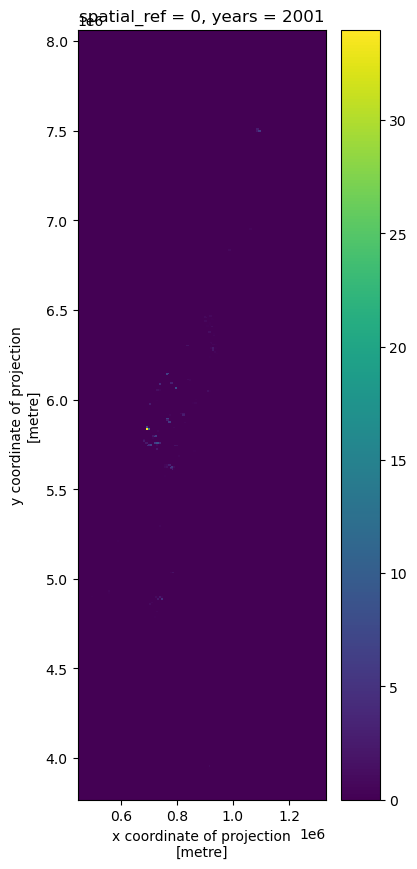

In [18]:
mbr.isel(years=0).plot( figsize=(4, 10))


### Load saved MBR raster and process Mann-Kandall

In [50]:
# read raster
mbr = rxr.open_rasterio('bdd_chile/MBR.tif')
# change dimension name from band to years
mbr = mbr.rename({'band': 'years'})
mbr

<xarray.DataArray (years: 22, y: 1, x: 1)>
[22 values with dtype=float64]
Coordinates:
  * years        (years) int64 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22
  * x            (x) float64 -250.0
  * y            (y) float64 -250.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    long_name:      ('MBA_2001', 'MBA_2002', 'MBA_2003', 'MBA_2004', 'MBA_200...
    name:           MBA_2001
    _FillValue:     nan
    scale_factor:   1.0
    add_offset:     0.0

### Mann-Kendall

In [59]:
product_names = ['trend', 'h', 'p', 'z', 'tau', 's', 'var_s', 'slope', 'intercept']
trend_dict = {'increasing': 1, 'no trend': 0, 'decreasing': -1}

def get_correlation(x):
  try:
    test = mk.correlated_seasonal_test(x)
    out = [f for f in test._asdict().values()]  # a lista, más fácil de iterar con el orden de `product_names`
    out[0] = trend_dict[out[0]]  # trend, que es texto, a numérico
    return np.stack(tuple(out), axis=-1)  # retorna un array donde cada elemento será un datarray independiente
  except: 
    return [0,0,0,0,0,0,0,0,0]

def apply_mk(obj: xr.DataArray, dim: list=['years'], output_variables=9, kwargs=None):
  if kwargs:
    res = xr.apply_ufunc(get_correlation, obj, input_core_dims=[dim], kwargs=kwargs, dask = 'allowed', vectorize = True, output_core_dims= [['variables']])
  else:
    res = xr.apply_ufunc(get_correlation, obj, input_core_dims=[dim], dask = 'allowed', vectorize = True, output_core_dims= [['variables']])
  return res.rename(dict(zip(range(len(product_names)), product_names)))

In [60]:
mk = apply_mk(mbr).to_dataset('variables')
mk

AttributeError: 'list' object has no attribute 'ndim'